In [ ]:
#!pip install pygad

In [223]:
import numpy
import pygad

# BASIC EXAMPLE: Linear Model - Single Objective

Given the following function:
    y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) and y=44
What are the best values for the 6 weights (w1 to w6)? We are going to use the genetic algorithm to optimize this function.

In [224]:
function_inputs = [4,-2,3.5,5,-11,-4.7] # Function inputs.
desired_output = 44 # Function output.

In [35]:
def fitness_func(ga_instance, solution, solution_idx):
    """
    Args:
        ga_instance: Instance of GA from pygad
        solution: CHROMOSOME/SOLUTION to be evaluated
        solution_ids: Necessary to GA
    """
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

In [36]:
num_generations = 100 # Number of generations.
num_parents_mating = 10 # Number of solutions to be selected as parents in the mating pool.

In [37]:
sol_per_pop = 20 # Number of solutions in the population.
num_genes = len(function_inputs)

In [131]:
last_fitness = 0
# Printing function at the end of one iter
def on_generation(ga_instance):
    global last_fitness
    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Population = {ga_instance.pop_size}")
    print(f"Fitness    = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]}")
    print(f"Change     = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness}")
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

In [132]:
ga_instance = pygad.GA(num_generations=num_generations, # NUM OF ITERS
                       num_parents_mating=num_parents_mating, # NUM SOLUTIONS TO BE SELECTED AS PARENTS
                       sol_per_pop=sol_per_pop, # NUMBER OGF SOLUTIONS IN THE POPULATION
                       num_genes=num_genes, # NUMBER OF GENES IN THE SOLUTION
                       fitness_func=fitness_func,
                       on_generation=on_generation,
                       mutation_probability=0.2,
                       save_solutions=True,
                       #save_best_solutions=True,
                       #stop_criteria="saturate_1000"
                       #stop_criteria="reach_100"
                       random_seed=42
                      )

# GENE_TYPE: list specifying the dtype of each gene
# INIT_RANGE_LOW/HIGH: upper and lower bounds of random generation
# KEEP ELITISM
# CROSSOVER_TYPE
# MUTATION_TYPE/PROB
# GENE_SPACE
# SAVE_[BEST]_SOLUTIONS
# STOP_CRITERIA
# PARALLEL_PROCESSING
# RANDOM_SEED

In [133]:
# Running the GA to optimize the parameters of the function.
ga_instance.run()

Generation = 1
Population = (20, 6)
Fitness    = 0.6565332485689315
Change     = 0.6565332485689315
Generation = 2
Population = (20, 6)
Fitness    = 0.6565332485689315
Change     = 0.0
Generation = 3
Population = (20, 6)
Fitness    = 3.6617538451324827
Change     = 3.005220596563551
Generation = 4
Population = (20, 6)
Fitness    = 3.6617538451324827
Change     = 0.0
Generation = 5
Population = (20, 6)
Fitness    = 36.273222068129236
Change     = 32.611468222996756
Generation = 6
Population = (20, 6)
Fitness    = 36.273222068129236
Change     = 0.0
Generation = 7
Population = (20, 6)
Fitness    = 36.273222068129236
Change     = 0.0
Generation = 8
Population = (20, 6)
Fitness    = 36.273222068129236
Change     = 0.0
Generation = 9
Population = (20, 6)
Fitness    = 36.273222068129236
Change     = 0.0
Generation = 10
Population = (20, 6)
Fitness    = 36.273222068129236
Change     = 0.0
Generation = 11
Population = (20, 6)
Fitness    = 36.273222068129236
Change     = 0.0
Generation = 12
Pop

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


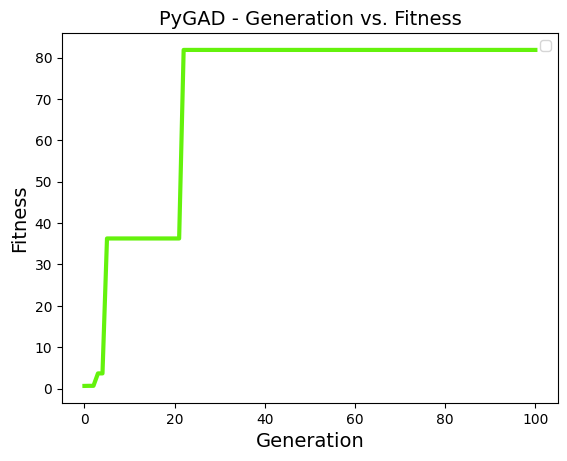

In [134]:
ga_instance.plot_fitness()
None

In [135]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Index of the best solution : {solution_idx}")

Parameters of the best solution : [-0.84356081 -2.84549269  2.80180518  0.42841414 -3.3594013   1.53846013]
Fitness value of the best solution = 81.84391853398536
Index of the best solution : 0


In [136]:
prediction = numpy.sum(numpy.array(function_inputs)*solution)
print(f"Predicted output based on the best solution : {prediction}")

Predicted output based on the best solution : 43.987782621189304


In [137]:
if ga_instance.best_solution_generation != -1:
    print(f"Best fitness value reached after {ga_instance.best_solution_generation} generations.")

Best fitness value reached after 22 generations.


In [138]:
# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


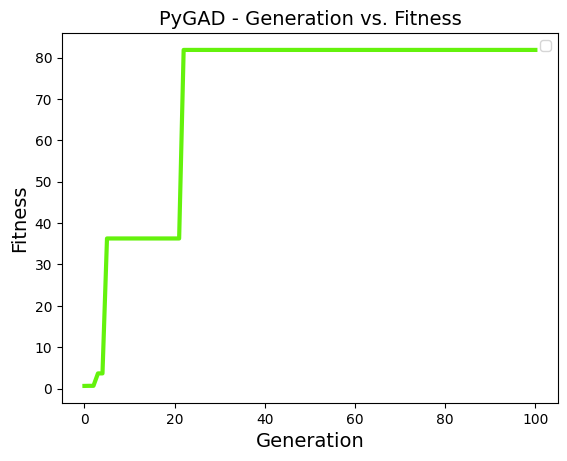

In [139]:
# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_fitness()
None

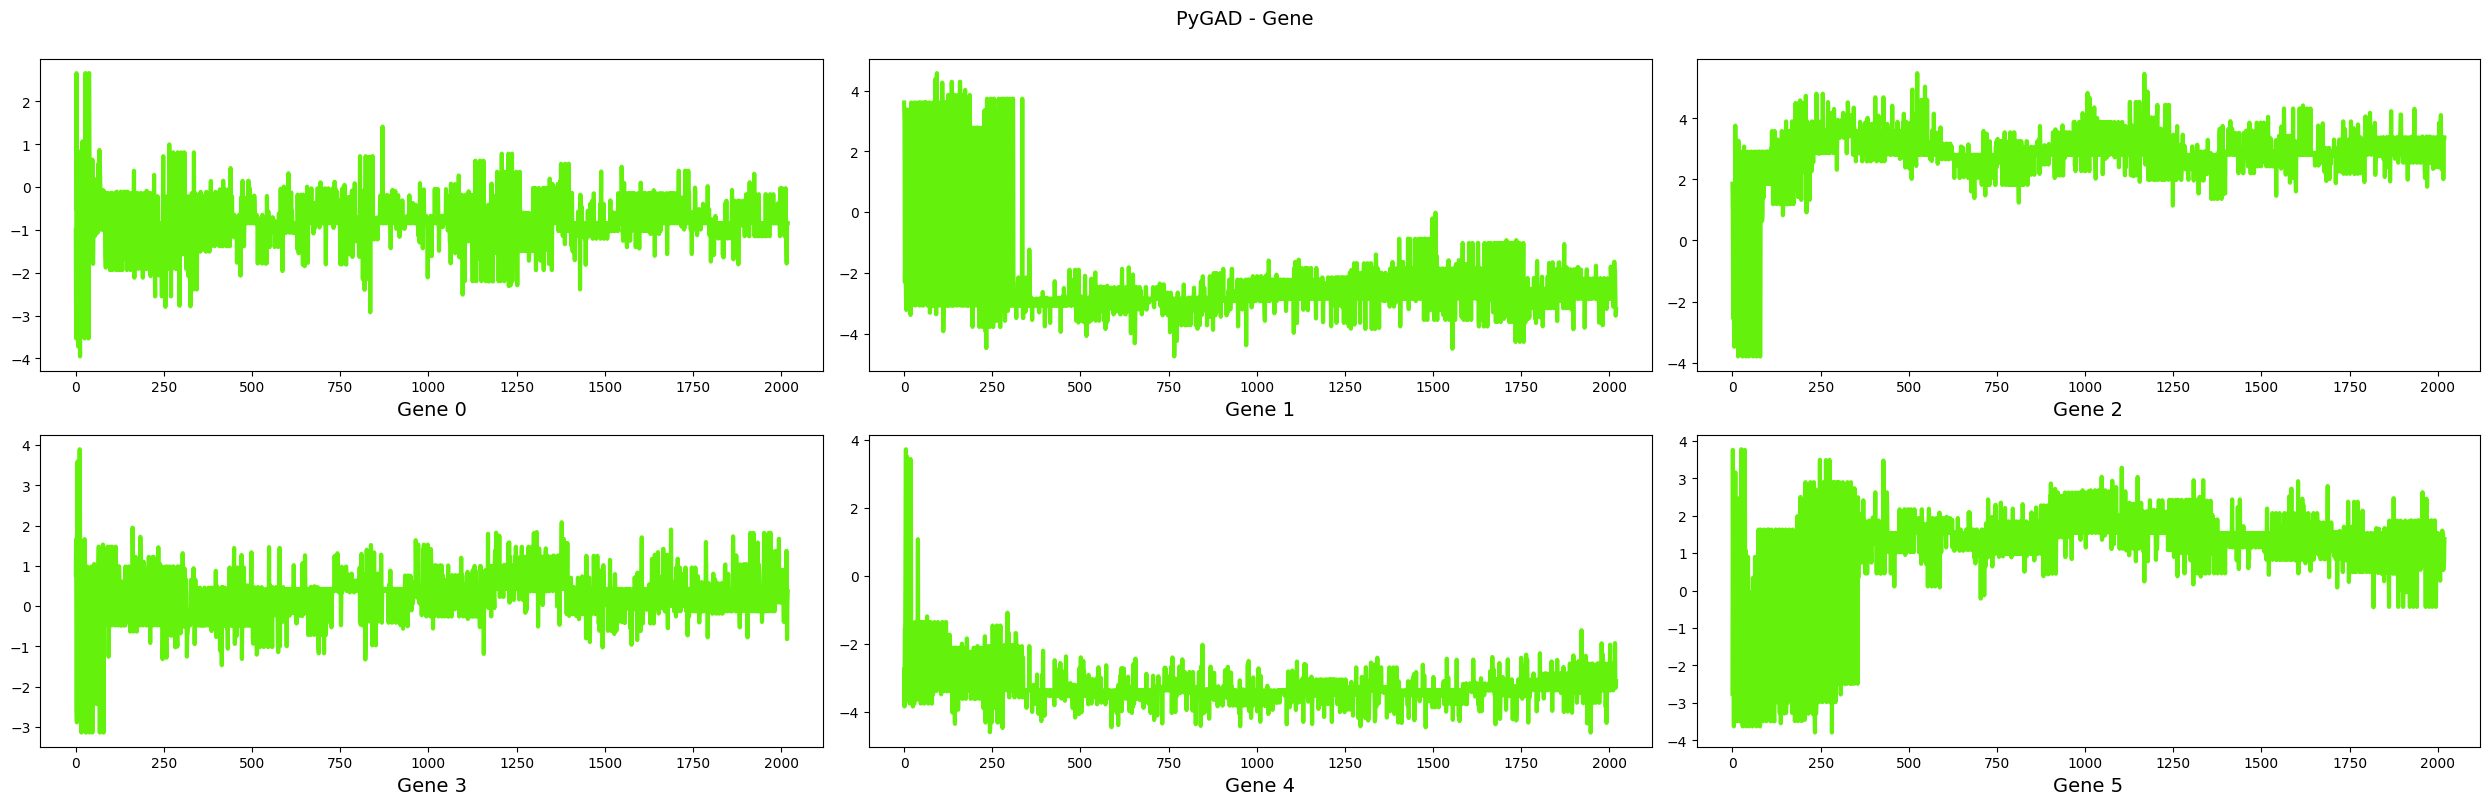

In [129]:
loaded_ga_instance.plot_genes()
None

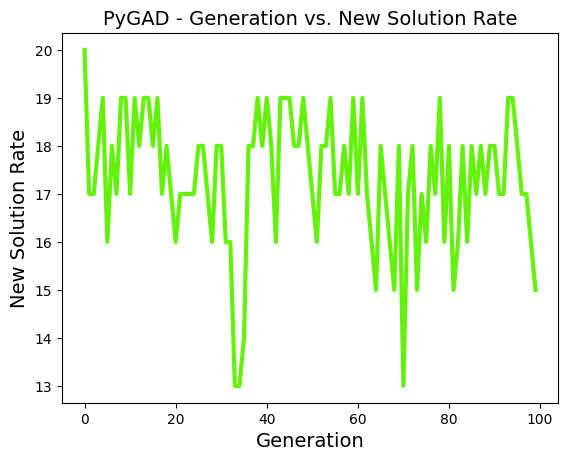

In [130]:
loaded_ga_instance.plot_new_solution_rate()
None

# CUSTOM EXAMPLE: Multitype Model - Single Objective

In [191]:
def original_function(params, x):
    #print(params, x)
    return numpy.sum(params[0] + params[1]*(x**2) + params[2]*(x**3))

# Want to find the combination of params that proce y=42 for x=2, third param is boolean, first is integer, second is float

In [192]:
function_inputs = 2 # Function inputs.
desired_output = 42 # Function output.

In [193]:
def fitness_func(ga_instance, solution, solution_idx):
    """
    Args:
        ga_instance: Instance of GA from pygad
        solution: CHROMOSOME/SOLUTION to be evaluated
        solution_ids: Necessary to GA
    """
    output = original_function(solution, function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

In [194]:
num_generations = 100 # Number of generations.
num_parents_mating = 10 # Number of solutions to be selected as parents in the mating pool.

In [195]:
sol_per_pop = 20 # Number of solutions in the population.
num_genes = 3 # NUMBER OF PARAMS

In [196]:
last_fitness = 0
# Printing function at the end of one iter
def on_generation(ga_instance):
    global last_fitness
    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Population = {ga_instance.pop_size}")
    print(f"Fitness    = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]}")
    print(f"Change     = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness}")
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

In [216]:
ga_instance = pygad.GA(num_generations=num_generations, # NUM OF ITERS
                       num_parents_mating=num_parents_mating, # NUM SOLUTIONS TO BE SELECTED AS PARENTS
                       sol_per_pop=sol_per_pop, # NUMBER OGF SOLUTIONS IN THE POPULATION
                       num_genes=num_genes, # NUMBER OF GENES IN THE SOLUTION
                       fitness_func=fitness_func,
                       on_generation=on_generation,
                       mutation_probability=0.2,
                       save_solutions=True,
                       gene_type = [int, float, int],
                       gene_space = [range(1,6), {'low':0, 'high':1}, [0,1]],
                       #save_best_solutions=True,
                       #stop_criteria="saturate_1000"
                       #stop_criteria="reach_100"
                       random_seed=42
                      )

# GENE_TYPE: list specifying the dtype of each gene
# INIT_RANGE_LOW/HIGH: upper and lower bounds of random generation
# KEEP ELITISM
# PARENT_SELECTION_TYPE: rank selection is interesting 
# CROSSOVER_TYPE: uniform is interesting
# MUTATION_TYPE/PROB: adaptive is nice, 
# GENE_SPACE
# SAVE_[BEST]_SOLUTIONS
# STOP_CRITERIA
# PARALLEL_PROCESSING
# RANDOM_SEED

# Extra info: https://blog.derlin.ch/genetic-algorithms-with-pygad

In [217]:
# Running the GA to optimize the parameters of the function.
ga_instance.run()

Generation = 1
Population = (20, 3)
Fitness    = 0.03980834417384587
Change     = -0.0001277564676836554
Generation = 2
Population = (20, 3)
Fitness    = 0.03990837168193376
Change     = 0.0001000275080878868
Generation = 3
Population = (20, 3)
Fitness    = 0.03990837168193376
Change     = 0.0
Generation = 4
Population = (20, 3)
Fitness    = 0.03990837168193376
Change     = 0.0
Generation = 5
Population = (20, 3)
Fitness    = 0.03990837168193376
Change     = 0.0
Generation = 6
Population = (20, 3)
Fitness    = 0.03990837168193376
Change     = 0.0
Generation = 7
Population = (20, 3)
Fitness    = 0.03991194145008708
Change     = 3.569768153320607e-06
Generation = 8
Population = (20, 3)
Fitness    = 0.03991194145008708
Change     = 0.0
Generation = 9
Population = (20, 3)
Fitness    = 0.03991194145008708
Change     = 0.0
Generation = 10
Population = (20, 3)
Fitness    = 0.03991194145008708
Change     = 0.0
Generation = 11
Population = (20, 3)
Fitness    = 0.03991194145008708
Change     = 0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


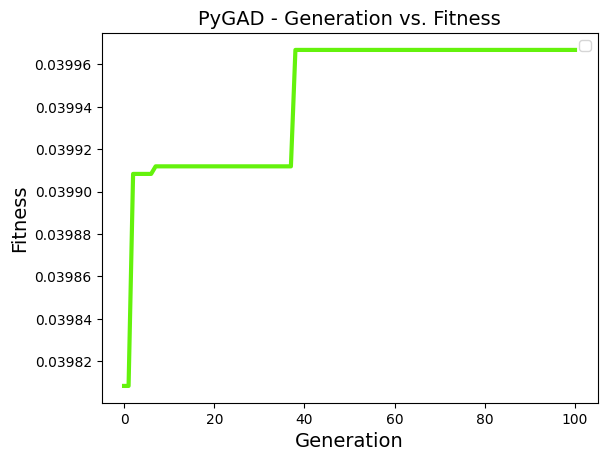

In [218]:
ga_instance.plot_fitness()
None

In [219]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Index of the best solution : {solution_idx}")

Parameters of the best solution : [5 0.994819293965951 1]
Fitness value of the best solution = 0.03996686934513668
Index of the best solution : 0


In [220]:
prediction = original_function(solution, function_inputs)
print(f"Predicted output based on the best solution : {prediction}")

Predicted output based on the best solution : 16.979277175863803


In [221]:
if ga_instance.best_solution_generation != -1:
    print(f"Best fitness value reached after {ga_instance.best_solution_generation} generations.")

Best fitness value reached after 38 generations.


In [222]:
ga_instance.summary()

----------------------------------------------------------------------
                           PyGAD Lifecycle                           
Step                   Handler                            Output Shape
Fitness Function       fitness_func()                     (1)      
----------------------------------------------------------------------
Parent Selection       steady_state_selection()           (10, 3)  
Number of Parents: 10
----------------------------------------------------------------------
Crossover              single_point_crossover()           (10, 3)  
----------------------------------------------------------------------
Mutation               random_mutation()                  (10, 3)  
Mutation Probability: 0.2
Mutation Genes: 1
Random Mutation Range: (-1.0, 1.0)
Gene Space: [[1, 2, 3, 4, 5], {'low': 0, 'high': 1}, [0, 1]]
Mutation by Replacement: False
Allow Duplicated Genes: True
----------------------------------------------------------------------
On Generat

"----------------------------------------------------------------------\n                           PyGAD Lifecycle                           \n======================================================================\nStep                   Handler                            Output Shape\n======================================================================\nFitness Function       fitness_func()                     (1)      \n----------------------------------------------------------------------\nParent Selection       steady_state_selection()           (10, 3)  \nNumber of Parents: 10\n----------------------------------------------------------------------\nCrossover              single_point_crossover()           (10, 3)  \n----------------------------------------------------------------------\nMutation               random_mutation()                  (10, 3)  \nMutation Probability: 0.2\nMutation Genes: 1\nRandom Mutation Range: (-1.0, 1.0)\nGene Space: [[1, 2, 3, 4, 5], {'low': 0, 'h